In [38]:
%pip install pyfiglet
from pyfiglet import Figlet
f = Figlet(font='Doom')
print(f.renderText('Deftones'))



______      __ _                        
|  _  \    / _| |                       
| | | |___| |_| |_ ___  _ __   ___  ___ 
| | | / _ \  _| __/ _ \| '_ \ / _ \/ __|
| |/ /  __/ | | || (_) | | | |  __/\__ \
|___/ \___|_|  \__\___/|_| |_|\___||___/
                                        
                                        



In [39]:
YOUR_TOKEN = '3PIRZsBtrjgIgcynl6f4QG0-Qcnzvh9XsQ-o5zBKSnRdg-BfDxJqZtR-Od7P1bSX'
GENIUS_API_TOKEN = YOUR_TOKEN
%pip install requests
%pip install lyricsgenius
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [40]:
import lyricsgenius
import requests

In [41]:
GENIUS_API_TOKEN = YOUR_TOKEN
genius = lyricsgenius.Genius(GENIUS_API_TOKEN)

In [42]:
genius.user_agent = "GoogleChrome"

try:
    artist = genius.search_artist("Deftones", sort="title")
    print(artist.songs)
except Exception as e:
    print("Error:", e)


Searching for songs by Deftones...

Song 1: "7 Words"
Song 2: "7 Words (Bleached W/ Color Guard version)"
Song 3: "7 Words (Demo)"
Song 4: "976-EVIL"
Song 5: "Acid Hologram"
Song 6: "Anniversary of an Uninteresting Event"
Song 7: "Answers (Demo)"
Song 8: "Around the Fur"
Song 9: "Back to School (Mini Maggit)"
Song 10: "Battle-Axe"
Song 11: "Beauty School"
Song 12: "Be Quiet and Drive (Far Away)"
Song 13: "Be Quiet And Drive (Far Away) (Acoustic)"
Song 14: "Be Quiet and Send The Pain Below (Far Away)"
Song 15: "Beware"
Song 16: "Birthmark"
Song 17: "Bklahnjanjsn"
Song 18: "Black Moon"
Song 19: "Bloody Cape"
Song 20: "Bong Hit"
Song 21: "Bored"
Song 22: "Bored (Live)"
Song 23: "Bumble D"
Song 24: "Can’t Even Breathe"
Song 25: "Caress"
Song 26: "Ceremony"
Song 27: "Ceremony (WHOKILLEDXIX Ceremonial Version)"
Song 28: "CHANGE"
Song 29: "Change (In the House of Flies)"
Song 30: "Change (In the House of Flies) (Acoustic)"
Song 31: "Change (In the House of Flies) (Alge Edit)"
Song 32: "Change

In [43]:
'''Now we are creating two lists, one with the lyrics and one with the song titles, then we will initialize a dictionary with titles as keys and lyrics as values'''
title = []
lyrics = []
for i in range(len(artist)):
    title.append(artist.songs[i].title)
    lyrics.append(artist.songs[i].lyrics)

In [44]:
import pandas as pd
import re
df = pd.DataFrame({"Title":title, "Lyrics":lyrics})
df

,Title,Lyrics
0,7 Words,54 Contributors7 Words Lyrics[Verse 1]\nI'll n...
1,7 Words (Bleached W/ Color Guard version),1 Contributor7 Words (Bleached W/ Color Guard ...
2,7 Words (Demo),3 Contributors7 Words (Demo) Lyrics[Verse 1]\n...
3,976-EVIL,21 Contributors976-EVIL Lyrics[Verse 1]\nFor a...
4,Acid Hologram,11 ContributorsAcid Hologram Lyrics[Verse 1]\n...
...,...,...
198,Xenon,13 ContributorsXenon Lyrics[Verse 1]\nYou're f...
199,Xerces,27 ContributorsXerces Lyrics[Verse 1]\nUnivers...
200,Xerces (Demo),2 ContributorsThis song is an instrumentalEmbed
201,You’ve Seen the Butcher,26 ContributorsYou’ve Seen the Butcher Lyrics[...


The lyrics data has some useless text that needs to be removed. These are the following:
verse, chorus, [chorus], [intro], intro/Intro, and finally the song title that is repeated in the lyrics column

In [45]:
df['Lyrics'] = df.apply(lambda x: x['Lyrics'].replace(x['Title'], ''), axis = 1)
df2 = df
df2


,Title,Lyrics
0,7 Words,54 Contributors Lyrics[Verse 1]\nI'll never be...
1,7 Words (Bleached W/ Color Guard version),"1 Contributor LyricsI'll never be the same, br..."
2,7 Words (Demo),3 Contributors Lyrics[Verse 1]\nI'll never be ...
3,976-EVIL,21 Contributors Lyrics[Verse 1]\nFor a thousan...
4,Acid Hologram,11 Contributors Lyrics[Verse 1]\nIn the haze o...
...,...,...
198,Xenon,13 Contributors Lyrics[Verse 1]\nYou're floati...
199,Xerces,27 Contributors Lyrics[Verse 1]\nUniverse surr...
200,Xerces (Demo),2 ContributorsThis song is an instrumentalEmbed
201,You’ve Seen the Butcher,26 Contributors Lyrics[Verse 1]\nDon't wanna t...


In [46]:
df2['Lyrics'] = df2['Lyrics'].str.replace(r'\[.*\]', '')
df3 = df2
df3

,Title,Lyrics
0,7 Words,54 Contributors Lyrics[Verse 1]\nI'll never be...
1,7 Words (Bleached W/ Color Guard version),"1 Contributor LyricsI'll never be the same, br..."
2,7 Words (Demo),3 Contributors Lyrics[Verse 1]\nI'll never be ...
3,976-EVIL,21 Contributors Lyrics[Verse 1]\nFor a thousan...
4,Acid Hologram,11 Contributors Lyrics[Verse 1]\nIn the haze o...
...,...,...
198,Xenon,13 Contributors Lyrics[Verse 1]\nYou're floati...
199,Xerces,27 Contributors Lyrics[Verse 1]\nUniverse surr...
200,Xerces (Demo),2 ContributorsThis song is an instrumentalEmbed
201,You’ve Seen the Butcher,26 Contributors Lyrics[Verse 1]\nDon't wanna t...


In [47]:
df3['Lyrics'] = df3['Lyrics'].str.replace('Lyrics', '')
df4 = df3
df4

,Title,Lyrics
0,7 Words,54 Contributors [Verse 1]\nI'll never be the s...
1,7 Words (Bleached W/ Color Guard version),"1 Contributor I'll never be the same, break in..."
2,7 Words (Demo),3 Contributors [Verse 1]\nI'll never be the sa...
3,976-EVIL,21 Contributors [Verse 1]\nFor a thousand days...
4,Acid Hologram,11 Contributors [Verse 1]\nIn the haze of your...
...,...,...
198,Xenon,13 Contributors [Verse 1]\nYou're floating out...
199,Xerces,27 Contributors [Verse 1]\nUniverse surrounds\...
200,Xerces (Demo),2 ContributorsThis song is an instrumentalEmbed
201,You’ve Seen the Butcher,26 Contributors [Verse 1]\nDon't wanna take it...


In [48]:
df4['Lyrics'] = df4['Lyrics'].str.replace('likeembed', '')
df5 = df4
df5

,Title,Lyrics
0,7 Words,54 Contributors [Verse 1]\nI'll never be the s...
1,7 Words (Bleached W/ Color Guard version),"1 Contributor I'll never be the same, break in..."
2,7 Words (Demo),3 Contributors [Verse 1]\nI'll never be the sa...
3,976-EVIL,21 Contributors [Verse 1]\nFor a thousand days...
4,Acid Hologram,11 Contributors [Verse 1]\nIn the haze of your...
...,...,...
198,Xenon,13 Contributors [Verse 1]\nYou're floating out...
199,Xerces,27 Contributors [Verse 1]\nUniverse surrounds\...
200,Xerces (Demo),2 ContributorsThis song is an instrumentalEmbed
201,You’ve Seen the Butcher,26 Contributors [Verse 1]\nDon't wanna take it...


In [49]:
df5['Lyrics'] = df5['Lyrics'].str.replace('likeEmbed', '')
df6 = df5
df6

,Title,Lyrics
0,7 Words,54 Contributors [Verse 1]\nI'll never be the s...
1,7 Words (Bleached W/ Color Guard version),"1 Contributor I'll never be the same, break in..."
2,7 Words (Demo),3 Contributors [Verse 1]\nI'll never be the sa...
3,976-EVIL,21 Contributors [Verse 1]\nFor a thousand days...
4,Acid Hologram,11 Contributors [Verse 1]\nIn the haze of your...
...,...,...
198,Xenon,13 Contributors [Verse 1]\nYou're floating out...
199,Xerces,27 Contributors [Verse 1]\nUniverse surrounds\...
200,Xerces (Demo),2 ContributorsThis song is an instrumentalEmbed
201,You’ve Seen the Butcher,26 Contributors [Verse 1]\nDon't wanna take it...


In [50]:
df6['Lyrics'] = df6['Lyrics'].str.replace(r'embed$','')
df7 = df6
df7

,Title,Lyrics
0,7 Words,54 Contributors [Verse 1]\nI'll never be the s...
1,7 Words (Bleached W/ Color Guard version),"1 Contributor I'll never be the same, break in..."
2,7 Words (Demo),3 Contributors [Verse 1]\nI'll never be the sa...
3,976-EVIL,21 Contributors [Verse 1]\nFor a thousand days...
4,Acid Hologram,11 Contributors [Verse 1]\nIn the haze of your...
...,...,...
198,Xenon,13 Contributors [Verse 1]\nYou're floating out...
199,Xerces,27 Contributors [Verse 1]\nUniverse surrounds\...
200,Xerces (Demo),2 ContributorsThis song is an instrumentalEmbed
201,You’ve Seen the Butcher,26 Contributors [Verse 1]\nDon't wanna take it...


In [51]:
df7['Lyrics'] = df7['Lyrics'].str.replace(r'Embed$', '')
df8 = df7
df8

,Title,Lyrics
0,7 Words,54 Contributors [Verse 1]\nI'll never be the s...
1,7 Words (Bleached W/ Color Guard version),"1 Contributor I'll never be the same, break in..."
2,7 Words (Demo),3 Contributors [Verse 1]\nI'll never be the sa...
3,976-EVIL,21 Contributors [Verse 1]\nFor a thousand days...
4,Acid Hologram,11 Contributors [Verse 1]\nIn the haze of your...
...,...,...
198,Xenon,13 Contributors [Verse 1]\nYou're floating out...
199,Xerces,27 Contributors [Verse 1]\nUniverse surrounds\...
200,Xerces (Demo),2 ContributorsThis song is an instrumentalEmbed
201,You’ve Seen the Butcher,26 Contributors [Verse 1]\nDon't wanna take it...


In [52]:

pattern = re.compile(r'\[.*?\]')
def remove_text_in_brackets(text):
    return re.sub(pattern, '', text)

df8['Lyrics'] = df8['Lyrics'].apply(remove_text_in_brackets)
df9 = df8
df9

,Title,Lyrics
0,7 Words,"54 Contributors \nI'll never be the same, brea..."
1,7 Words (Bleached W/ Color Guard version),"1 Contributor I'll never be the same, break in..."
2,7 Words (Demo),"3 Contributors \nI'll never be the same, break..."
3,976-EVIL,21 Contributors \nFor a thousand days\nYou've ...
4,Acid Hologram,11 Contributors \nIn the haze of your light\nW...
...,...,...
198,Xenon,13 Contributors \nYou're floating out astray\n...
199,Xerces,27 Contributors \nUniverse surrounds\nWhen you...
200,Xerces (Demo),2 ContributorsThis song is an instrumentalEmbed
201,You’ve Seen the Butcher,26 Contributors \nDon't wanna take it slow\nI ...


In [53]:
pattern2 = re.compile(r'^\d+\sContributors\s', flags=re.IGNORECASE)

def remove_pattern(text):
    return re.sub(pattern2, '', text)

df9['Lyrics'] = df9['Lyrics'].apply(remove_pattern)
df10 = df9
df10

,Title,Lyrics
0,7 Words,"\nI'll never be the same, break in decency\nDo..."
1,7 Words (Bleached W/ Color Guard version),"1 Contributor I'll never be the same, break in..."
2,7 Words (Demo),"\nI'll never be the same, breaking decency\nDo..."
3,976-EVIL,\nFor a thousand days\nYou've been staring awa...
4,Acid Hologram,\nIn the haze of your light\nWe bathe and wane...
...,...,...
198,Xenon,\nYou're floating out astray\nThis cold and li...
199,Xerces,\nUniverse surrounds\nWhen you're ready\nIt wa...
200,Xerces (Demo),2 ContributorsThis song is an instrumentalEmbed
201,You’ve Seen the Butcher,\nDon't wanna take it slow\nI wanna take you h...


In [54]:
df11 = df10[~df10['Lyrics'].str.contains('This song is an instrumental')]
df11.reset_index(drop=True, inplace=True)
df11

,Title,Lyrics
0,7 Words,"\nI'll never be the same, break in decency\nDo..."
1,7 Words (Bleached W/ Color Guard version),"1 Contributor I'll never be the same, break in..."
2,7 Words (Demo),"\nI'll never be the same, breaking decency\nDo..."
3,976-EVIL,\nFor a thousand days\nYou've been staring awa...
4,Acid Hologram,\nIn the haze of your light\nWe bathe and wane...
...,...,...
181,Wicked,1 Contributor Yo Chuck! We got running mixes.....
182,Xenon,\nYou're floating out astray\nThis cold and li...
183,Xerces,\nUniverse surrounds\nWhen you're ready\nIt wa...
184,You’ve Seen the Butcher,\nDon't wanna take it slow\nI wanna take you h...


In [56]:

df11.loc[:,('Lyrics')] = df11['Lyrics'].str.replace('See Deftones LiveGet tickets as low as $131You might also like', '')
df12 = df11
df12

,Title,Lyrics
0,7 Words,"\nI'll never be the same, break in decency\nDo..."
1,7 Words (Bleached W/ Color Guard version),"1 Contributor I'll never be the same, break in..."
2,7 Words (Demo),"\nI'll never be the same, breaking decency\nDo..."
3,976-EVIL,\nFor a thousand days\nYou've been staring awa...
4,Acid Hologram,\nIn the haze of your light\nWe bathe and wane...
...,...,...
181,Wicked,1 Contributor Yo Chuck! We got running mixes.....
182,Xenon,\nYou're floating out astray\nThis cold and li...
183,Xerces,\nUniverse surrounds\nWhen you're ready\nIt wa...
184,You’ve Seen the Butcher,\nDon't wanna take it slow\nI wanna take you h...


In [57]:
df12.to_csv('lyrics.csv', index=False)

In [58]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [59]:
import nltk
from nltk.text import Text
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to C:\Users\Logang 4
[nltk_data]     Lyfe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Logang 4
[nltk_data]     Lyfe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Logang 4
[nltk_data]     Lyfe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Logang 4 Lyfe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Logang 4
[nltk_data]     Lyfe\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Logang 4
[nltk_data]     Lyfe\AppData\Roaming\nltk_da

True

In [60]:
text = df12.Lyrics
text = text.str.cat(sep=' ')
text = text.lower()
text = word_tokenize(text)
text = [word for word in text if word.isalpha()]
stop_words = set(stopwords.words('english'))
text = [w for w in text if not w in stop_words]
text = [word for word in text if len(word) > 2]
text1 = Text(text)
text1

<Text: never break decency tree trunk fall living roots...>

In [61]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [62]:
%pip install wordcloud

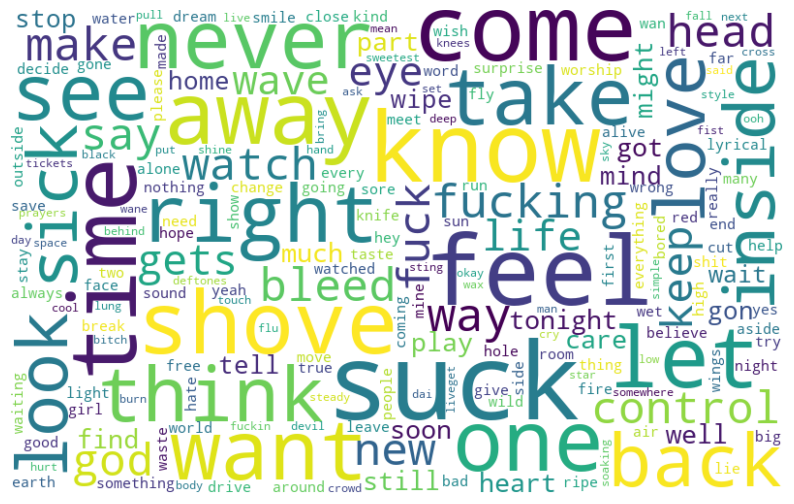

In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
# Assuming df11 and other necessary imports are correctly set up

# Your existing text processing code
text = df11.Lyrics.str.cat(sep=' ').lower()
text = word_tokenize(text)
text = [word for word in text if word.isalpha() and word not in set(stopwords.words('english')) and len(word) > 2]
text = ' '.join(text)  # Ensure text is a single string

# Generate word cloud with a colormap
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white', collocations=False, colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [64]:
#put the 10 most common words in Lyrics in a dataframe
fdist = FreqDist(text1)
fdist.most_common(10)
comword = pd.DataFrame(fdist.most_common(10), columns = ['Word', 'Frequency'])
comword

,Word,Frequency
0,like,219
1,suck,212
2,get,211
3,know,159
4,feel,158
5,time,156
6,away,139
7,come,139
8,shove,139
9,let,129


In [65]:
comword_dict = comword.set_index('Word').T.to_dict('records')
comword_dict

[{'like': 219,
  'suck': 212,
  'get': 211,
  'know': 159,
  'feel': 158,
  'time': 156,
  'away': 139,
  'come': 139,
  'shove': 139,
  'let': 129}]

['like', 'suck', 'get', 'know', 'feel', 'time', 'away', 'come', 'shove', 'let']
[219, 212, 211, 159, 158, 156, 139, 139, 139, 129]


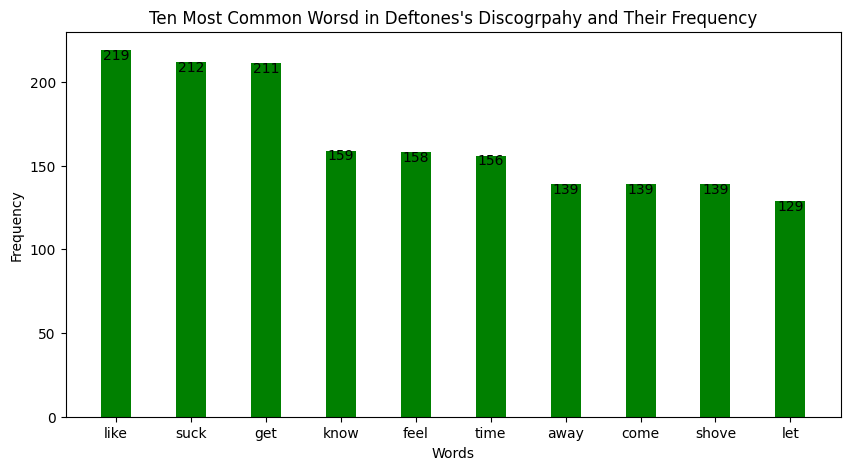

In [67]:
Lyrics = list(comword_dict[0].keys())
Values = list(comword_dict[0].values())

print(Lyrics)
print(Values)
fig = plt.figure(figsize = (10,5))

#creating the bar plot
plt.bar(Lyrics, Values, color='Green', width = 0.4)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Ten Most Common Worsd in Deftones's Discogrpahy and Their Frequency")

#annotates the bars with the frequency of the words
for index,data in enumerate(Values):
    plt.text(x=index, y=data+1,s=f"{data}", fontdict=dict(fontsize=10), ha='center', va='top', color='black')
plt.show()



In [68]:
#Bigrams to show common word groupings
from nltk.util import ngrams
from collections import Counter
n = 2
bigrams = ngrams(text1, n)
Counter(bigrams).most_common(10)

[(('suck', 'suck'), 187),
 (('shove', 'shove'), 96),
 (('bleed', 'control'), 66),
 (('part', 'gets'), 54),
 (('get', 'knife'), 40),
 (('soon', 'let'), 38),
 (('feel', 'sick'), 38),
 (('feel', 'like'), 36),
 (('control', 'bleed'), 34),
 (('wipe', 'lyrical'), 33)]

In [69]:
#tri-grams to show common word triplets
n = 3
trigrams = ngrams(text1, n)
Counter(trigrams).most_common(10)

[(('suck', 'suck', 'suck'), 169),
 (('shove', 'shove', 'shove'), 72),
 (('bleed', 'control', 'bleed'), 34),
 (('soon', 'let', 'soon'), 33),
 (('ripe', 'bleed', 'control'), 32),
 (('control', 'bleed', 'control'), 32),
 (('let', 'soon', 'let'), 32),
 (('part', 'gets', 'sore'), 26),
 (('feel', 'sick', 'feel'), 26),
 (('sick', 'feel', 'sick'), 26)]

In [70]:
#Script that will generate a random phrase based on text in Turnstile discography
import random
def generate_sentence():
    sentence = []
    for i in range(10):
        sentence.append(random.choice(text1))
    return ' '.join(sentence)
generate_sentence()


'heartless taste take oxygen away sound power show cold anemic'